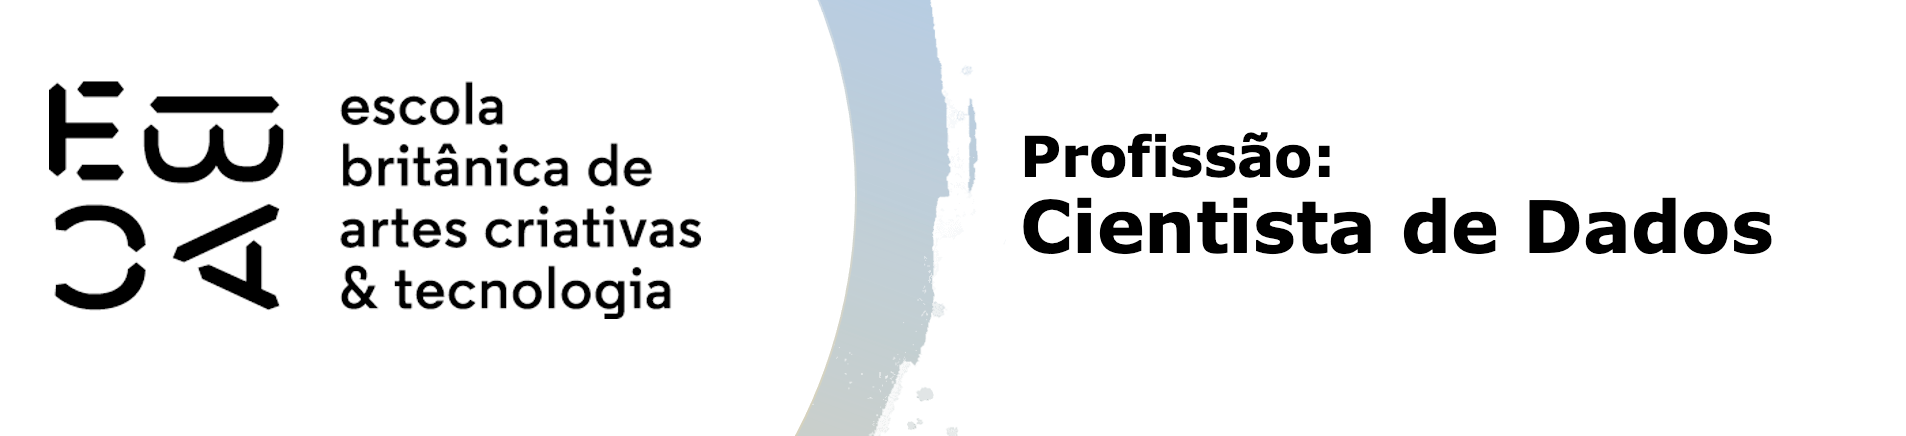

# Tarefa I

Neste projeto, estamos construindo um credit scoring para cartão de crédito, em um desenho amostral com 15 safras, e utilizando 12 meses de performance.

Carregue a base de dados ```credit_scoring.ftr```.

In [1]:
import pandas as pd
import numpy as np

df = pd.read_feather('credit_scoring.ftr')
df.head()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,mau
0,2015-01-01,5733,F,N,N,0,Empresário,Médio,Solteiro,Casa,43,6.873973,1.0,2515.39,False
1,2015-01-01,727,F,S,S,0,Assalariado,Médio,Casado,Casa,35,4.526027,2.0,3180.19,False
2,2015-01-01,6374,F,N,N,2,Assalariado,Médio,Casado,Casa,31,0.243836,4.0,1582.29,False
3,2015-01-01,9566,F,N,N,0,Assalariado,Médio,Casado,Casa,54,12.772603,2.0,13721.17,False
4,2015-01-01,9502,F,S,N,0,Assalariado,Superior incompleto,Solteiro,Casa,31,8.432877,1.0,2891.08,False


## Amostragem

Separe os três últimos meses como safras de validação *out of time* (oot).

Variáveis:<br>
Considere que a variável ```data_ref``` não é uma variável explicativa, é somente uma variável indicadora da safra, e não deve ser utilizada na modelagem. A variávei ```index``` é um identificador do cliente, e também não deve ser utilizada como covariável (variável explicativa). As restantes podem ser utilizadas para prever a inadimplência, incluindo a renda.


In [2]:
# Ordenar o DataFrame por data_ref para garantir que as safras estão na ordem correta
df_2 = df.sort_values(by='data_ref')

# Verificar se a ordenação está correta
print(df_2['data_ref'].head())
print(df_2['data_ref'].tail())

# Encontrar as datas únicas e a terceira última safra
unique_dates = df_2['data_ref'].unique()
third_last_safra = unique_dates[-3]

# Encontrar datas únicas em ordem
unique_dates = df_2['data_ref'].unique()
print(unique_dates)

# Identificar a terceira última safra
third_last_safra = unique_dates[-3]
print(f"Terceira última safra: {third_last_safra}")

0       2015-01-01
33328   2015-01-01
33329   2015-01-01
33330   2015-01-01
33331   2015-01-01
Name: data_ref, dtype: datetime64[ns]
716668   2016-03-01
716669   2016-03-01
716670   2016-03-01
716648   2016-03-01
749999   2016-03-01
Name: data_ref, dtype: datetime64[ns]
<DatetimeArray>
['2015-01-01 00:00:00', '2015-02-01 00:00:00', '2015-03-01 00:00:00',
 '2015-04-01 00:00:00', '2015-05-01 00:00:00', '2015-06-01 00:00:00',
 '2015-07-01 00:00:00', '2015-08-01 00:00:00', '2015-09-01 00:00:00',
 '2015-10-01 00:00:00', '2015-11-01 00:00:00', '2015-12-01 00:00:00',
 '2016-01-01 00:00:00', '2016-02-01 00:00:00', '2016-03-01 00:00:00']
Length: 15, dtype: datetime64[ns]
Terceira última safra: 2016-01-01 00:00:00


In [3]:
# Separar dataset em treinamento e validação
df_train = df_2[df_2['data_ref'] < third_last_safra]
df_val = df_2[df_2['data_ref'] >= third_last_safra]

# Verificar tamanhos dos conjuntos
print(f"Conjunto de treinamento: {df_train.shape}")
print(f"Conjunto de validação: {df_val.shape}")

Conjunto de treinamento: (600000, 15)
Conjunto de validação: (150000, 15)


In [4]:
# Definir as features e o target
features = ['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda']
target = 'mau'

# Verificar se todas as features estão presentes no dataset de treinamento
print(df_train[features].head())

      sexo posse_de_veiculo posse_de_imovel  qtd_filhos   tipo_renda  \
0        F                N               N           0   Empresário   
33328    M                S               S           1  Assalariado   
33329    F                N               N           0  Assalariado   
33330    M                N               S           1  Assalariado   
33331    F                N               S           1  Assalariado   

                  educacao estado_civil tipo_residencia  idade  tempo_emprego  \
0                    Médio     Solteiro            Casa     43       6.873973   
33328                Médio       Casado            Casa     41       8.134247   
33329    Superior completo     Solteiro            Casa     26       1.424658   
33330  Superior incompleto       Casado            Casa     37      15.449315   
33331                Médio       Casado            Casa     30       0.369863   

       qt_pessoas_residencia     renda  
0                        1.0   2515.39 

## Descritiva básica univariada

- Descreva a base quanto ao número de linhas, número de linhas para cada mês em ```data_ref```.
- Faça uma descritiva básica univariada de cada variável. Considere as naturezas diferentes: qualitativas e quantitativas.

In [5]:
# Número total de linhas no dataset
total_rows = len(df_2)

# Número de linhas para cada mês em 'data_ref'
rows_per_month = df_2['data_ref'].value_counts().sort_index()

print("Número total de linhas:", total_rows)
print("\nNúmero de linhas por mês em 'data_ref':")
print(rows_per_month)

Número total de linhas: 750000

Número de linhas por mês em 'data_ref':
data_ref
2015-01-01    50000
2015-02-01    50000
2015-03-01    50000
2015-04-01    50000
2015-05-01    50000
2015-06-01    50000
2015-07-01    50000
2015-08-01    50000
2015-09-01    50000
2015-10-01    50000
2015-11-01    50000
2015-12-01    50000
2016-01-01    50000
2016-02-01    50000
2016-03-01    50000
Name: count, dtype: int64


In [6]:
# Lista de variáveis qualitativas disponíveis
qualitative_vars = ['sexo']

# Descrição das variáveis qualitativas
for var in qualitative_vars:
    if var in df_2.columns:
        print(f"\nDistribuição de '{var}':")
        print(df_2[var].value_counts())
    else:
        print(f"\nVariável '{var}' não encontrada no DataFrame.")


Distribuição de 'sexo':
sexo
F    504580
M    245420
Name: count, dtype: int64


In [7]:
# Lista de variáveis quantitativas disponíveis
quantitative_vars = ['idade', 'renda']

# Descrição das variáveis quantitativas
if quantitative_vars:
    quantitative_description = df_2[quantitative_vars].describe()
    print("\nEstatísticas descritivas para variáveis quantitativas:")
    print(quantitative_description)
else:
    print("Nenhuma variável quantitativa encontrada no DataFrame.")


Estatísticas descritivas para variáveis quantitativas:
               idade         renda
count  750000.000000  7.500000e+05
mean       43.804733  2.323854e+04
std        11.229868  7.910601e+04
min        22.000000  1.076700e+02
25%        34.000000  3.467700e+03
50%        43.000000  7.861820e+03
75%        53.000000  1.831828e+04
max        68.000000  4.083986e+06


## Descritiva bivariada

Faça uma análise descritiva bivariada de cada variável

In [8]:
# Criar coluna 'mau' 
df_2['mau'] = df_2['renda'] < 2000

def calculate_iv(data, feature, target, bins=10):
    # Binarizar a variável alvo se não estiver binarizada
    if data[target].dtype != np.dtype('bool'):
        data[target] = data[target].astype(bool)
    
    # Discretizar variáveis contínuas em bins
    if pd.api.types.is_numeric_dtype(data[feature]):
        data[feature] = pd.qcut(data[feature], q=bins, duplicates='drop')
    
    # Contagem dos grupos de bons e maus
    grouped = data.groupby(feature)[target].agg(['count', 'sum'])
    grouped.columns = ['total', 'bads']
    grouped['goods'] = grouped['total'] - grouped['bads']
    
    # Calcular proporções de bons e maus
    grouped['good_dist'] = grouped['goods'] / grouped['goods'].sum()
    grouped['bad_dist'] = grouped['bads'] / grouped['bads'].sum()
    
    # Calcular o WOE (Weight of Evidence) e o IV
    grouped['woe'] = np.log(grouped['good_dist'] / grouped['bad_dist']).replace({np.inf: 0, -np.inf: 0})
    grouped['iv'] = (grouped['good_dist'] - grouped['bad_dist']) * grouped['woe']
    
    iv = grouped['iv'].sum()
    return iv

# Lista de variáveis para calcular o IV
features = ['sexo', 'idade', 'renda']

# Calcular o IV de cada variável
iv_values = {}
for feature in features:
    iv = calculate_iv(df, feature, 'mau')
    iv_values[feature] = iv
    print(f"Information Value de {feature}: {iv:.4f}")

Information Value de sexo: 0.0022
Information Value de idade: 0.0208
Information Value de renda: 1.1634


C:\Users\marce\AppData\Local\Temp\ipykernel_15052\3092676669.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(feature)[target].agg(['count', 'sum'])
C:\Users\marce\AppData\Local\Temp\ipykernel_15052\3092676669.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(feature)[target].agg(['count', 'sum'])


In [9]:
# Verificar a distribuição de 'mau' para cada variável
for feature in features:
    print(f"\nDistribuição de 'mau' por '{feature}':")
    print(df.groupby(feature)['mau'].value_counts(normalize=True))


Distribuição de 'mau' por 'sexo':
sexo  mau  
F     False    0.919478
      True     0.080522
M     False    0.926603
      True     0.073397
Name: proportion, dtype: float64

Distribuição de 'mau' por 'idade':


C:\Users\marce\AppData\Local\Temp\ipykernel_15052\4222785129.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby(feature)['mau'].value_counts(normalize=True))


idade           mau  
(21.999, 29.0]  False    0.898211
                True     0.101789
(29.0, 33.0]    False    0.913427
                True     0.086573
(33.0, 36.0]    False    0.919009
                True     0.080991
(36.0, 40.0]    False    0.920593
                True     0.079407
(40.0, 43.0]    False    0.930049
                True     0.069951
(43.0, 47.0]    False    0.925562
                True     0.074438
(47.0, 51.0]    False    0.935800
                True     0.064200
(51.0, 55.0]    False    0.933138
                True     0.066862
(55.0, 60.0]    False    0.927717
                True     0.072283
(60.0, 68.0]    False    0.920367
                True     0.079633
Name: proportion, dtype: float64

Distribuição de 'mau' por 'renda':
renda                    mau  
(107.669, 1753.384]      False    0.720747
                         True     0.279253
(1753.384, 2860.64]      False    0.848846
                         True     0.151154
(2860.64, 4140.52]       F

C:\Users\marce\AppData\Local\Temp\ipykernel_15052\4222785129.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby(feature)['mau'].value_counts(normalize=True))


## Desenvolvimento do modelo

Desenvolva um modelo de *credit scoring* através de uma regressão logística.

- Trate valores missings e outliers
- Trate 'zeros estruturais'
- Faça agrupamentos de categorias conforme vimos em aula
- Proponha uma equação preditiva para 'mau'
- Caso hajam categorias não significantes, justifique

In [10]:
# Preenchendo missing de tempo_emprego com a média
df_2.fillna({'tempo_emprego': df_2.tempo_emprego.mean()}, inplace=True)
df_2.tempo_emprego.isna().sum()

0

In [11]:
# Verificar a presença de zeros em variáveis potencialmente afetadas
zero_counts = df_2[['qtd_filhos', 'tempo_emprego', 'qt_pessoas_residencia']].apply(lambda x: (x==0).sum())
print(zero_counts)

qtd_filhos               517331
tempo_emprego                 0
qt_pessoas_residencia         0
dtype: int64


In [12]:
# Criar uma variável indicadora para zero em 'qtd_filhos'
df_2['qtd_filhos_zero'] = (df_2['qtd_filhos'] == 0).astype(int)

# Verificar a distribuição após a criação da variável indicadora
print(df_2[['qtd_filhos', 'qtd_filhos_zero']].head())

       qtd_filhos  qtd_filhos_zero
0               0                1
33328           1                0
33329           0                1
33330           1                0
33331           1                0


In [13]:
# Verificar o impacto nos dados
print(df_2['qtd_filhos_zero'].value_counts(normalize=True))

qtd_filhos_zero
1    0.689775
0    0.310225
Name: proportion, dtype: float64


In [14]:
# Verificar a distribuição das categorias
for col in ['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia']:
    print(f"\nDistribuição de {col}:")
    print(df_2[col].value_counts(normalize=True))


Distribuição de sexo:
sexo
F    0.672773
M    0.327227
Name: proportion, dtype: float64

Distribuição de posse_de_veiculo:
posse_de_veiculo
N    0.610605
S    0.389395
Name: proportion, dtype: float64

Distribuição de posse_de_imovel:
posse_de_imovel
S    0.671589
N    0.328411
Name: proportion, dtype: float64

Distribuição de tipo_renda:
tipo_renda
Assalariado         0.514320
Empresário          0.230283
Pensionista         0.168353
Servidor público    0.086563
Bolsista            0.000481
Name: proportion, dtype: float64

Distribuição de educacao:
educacao
Médio                  0.675781
Superior completo      0.272408
Superior incompleto    0.039295
Fundamental            0.011433
Pós graduação          0.001083
Name: proportion, dtype: float64

Distribuição de estado_civil:
estado_civil
Casado      0.701963
Solteiro    0.122212
União       0.076913
Separado    0.056761
Viúvo       0.042151
Name: proportion, dtype: float64

Distribuição de tipo_residencia:
tipo_residencia
Casa    

In [15]:
# Agrupamento por 'educacao'
df_2['educacao_agrupada'] = df_2['educacao'].replace({
    'Analfabeto': 'Baixo',
    'Fundamental': 'Baixo',
    'Médio': 'Médio',
    'Superior incompleto': 'Alto',
    'Superior completo': 'Alto',
    'Pós-graduação': 'Alto'
})

# Agrupamento por 'estado_civil'
df_2['estado_civil_agrupado'] = df_2['estado_civil'].replace({
    'Solteiro': 'Solteiro',
    'Casado': 'Casado',
    'Divorciado': 'Outros',
    'Viúvo': 'Outros',
    'Separado': 'Outros'
})

# Agrupamento por 'tipo_renda'
df_2['tipo_renda_agrupado'] = df_2['tipo_renda'].replace({
    'Empresário': 'Trabalhador',
    'Assalariado': 'Trabalhador',
    'Servidor público': 'Trabalhador',
    'Pensionista': 'Não Trabalhador',
    'Estudante': 'Não Trabalhador'
})

In [16]:
# Verificar as novas distribuições
for col in ['educacao_agrupada', 'estado_civil_agrupado', 'tipo_renda_agrupado']:
    print(f"\nDistribuição de {col} após agrupamento:")
    print(df_2[col].value_counts(normalize=True))


Distribuição de educacao_agrupada após agrupamento:
educacao_agrupada
Médio            0.675781
Alto             0.311703
Baixo            0.011433
Pós graduação    0.001083
Name: proportion, dtype: float64

Distribuição de estado_civil_agrupado após agrupamento:
estado_civil_agrupado
Casado      0.701963
Solteiro    0.122212
Outros      0.098912
União       0.076913
Name: proportion, dtype: float64

Distribuição de tipo_renda_agrupado após agrupamento:
tipo_renda_agrupado
Trabalhador        0.831165
Não Trabalhador    0.168353
Bolsista           0.000481
Name: proportion, dtype: float64


In [17]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt

VIF após remoção de colinearidade e tratamento de outliers:
                                feature           VIF
0                            qtd_filhos  1.467345e+00
1                         tempo_emprego  3.196789e+00
2                                 renda  1.754048e-07
3                                sexo_M  1.788008e+00
4                    posse_de_veiculo_S  1.949465e+00
5                     posse_de_imovel_S  3.161054e+00
6               educacao_agrupada_Baixo  1.049180e+00
7               educacao_agrupada_Médio  3.188002e+00
8       educacao_agrupada_Pós graduação  1.004937e+00
9          estado_civil_agrupado_Outros  1.189940e+00
10       estado_civil_agrupado_Solteiro  1.200334e+00
11          estado_civil_agrupado_União  1.116821e+00
12  tipo_renda_agrupado_Não Trabalhador  1.380344e+00
13                 tipo_residencia_Casa  8.302187e+00
14          tipo_residencia_Com os pais  1.258426e+00
15          tipo_residencia_Comunitário  1.026392e+00
16              tipo_r

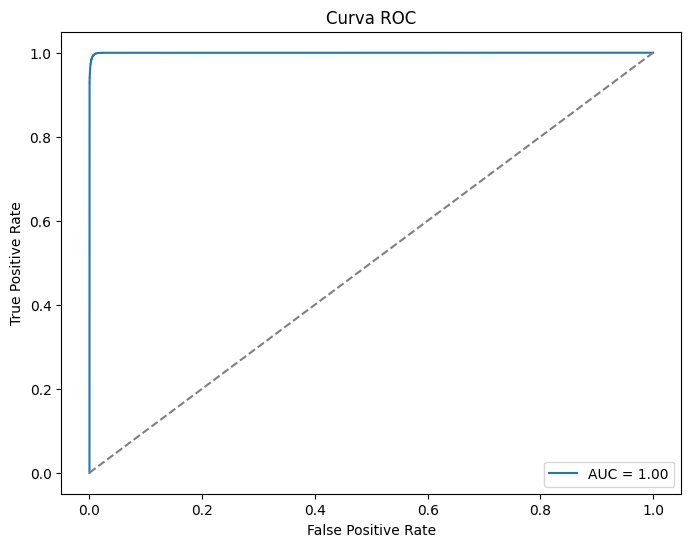

In [18]:
# Verificar se há dados missing nas variáveis categóricas e tratá-los
df_2.fillna({'educacao_agrupada': df_2['educacao_agrupada'].mode()[0],
             'estado_civil_agrupado': df_2['estado_civil_agrupado'].mode()[0],
             'tipo_renda_agrupado': df_2['tipo_renda_agrupado'].mode()[0]}, inplace=True)

# Recriar o conjunto de features
features_agrupadas = [
    'sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos', 
    'educacao_agrupada', 'estado_civil_agrupado', 'tipo_renda_agrupado', 
    'tipo_residencia', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda'
]

# Tratar valores missing apenas nas colunas numéricas
numerical_features = ['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda']
df_2[numerical_features] = df_2[numerical_features].fillna(df_2[numerical_features].median())

# Criar dummies para as variáveis categóricas, excluindo a primeira categoria para evitar colinearidade
X = pd.get_dummies(df_2[features_agrupadas], drop_first=True)

# Converter booleanos para inteiros
X = X.astype(int)

# Verificar e remover colunas constantes
X = X.loc[:, (X != X.iloc[0]).any()]

# Verificar e lidar com outliers usando quantis
for col in numerical_features:
    q1 = df_2[col].quantile(0.25)
    q3 = df_2[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    # Limitar os valores dentro dos limites
    df_2[col] = np.clip(df_2[col], lower_bound, upper_bound)

# Função para remover variáveis com alto VIF
def remove_high_vif(X, threshold=10.0):
    while True:
        vif_data = pd.DataFrame()
        vif_data["feature"] = X.columns
        vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
        
        # Encontrar a variável com maior VIF
        max_vif = vif_data["VIF"].max()
        if max_vif > threshold:
            drop_feature = vif_data.sort_values("VIF", ascending=False)["feature"].iloc[0]
            X = X.drop(columns=drop_feature)
        else:
            break
    return X, vif_data

# Remover variáveis com alto VIF
X, vif_data = remove_high_vif(X)

print("VIF após remoção de colinearidade e tratamento de outliers:")
print(vif_data)

# Adicionar constante para o modelo
X = sm.add_constant(X, has_constant='add')

# Normalizar os dados numéricos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Ajustar modelo de regressão logística com regularização
try:
    logit_model = LogisticRegression(max_iter=1000, penalty='l2', solver='liblinear')
    logit_model.fit(X_scaled, df_2['mau'].astype(int))

    # Resumo do modelo
    print("Coeficientes do modelo regularizado:", logit_model.coef_)

    # Realizar previsões
    y_pred_proba = logit_model.predict_proba(X_scaled)[:, 1]
    y_pred = logit_model.predict(X_scaled)

    # Avaliação do modelo
    accuracy = accuracy_score(df_2['mau'].astype(int), y_pred)
    auc = roc_auc_score(df_2['mau'].astype(int), y_pred_proba)
    fpr, tpr, _ = roc_curve(df_2['mau'].astype(int), y_pred_proba)

    print(f"Acurácia: {accuracy}")
    print(f"AUC: {auc}")

    # Plotar curva ROC
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Curva ROC')
    plt.legend()
    plt.show()

except np.linalg.LinAlgError as e:
    print("Erro de linearidade:", e)
except Exception as e:
    print("Outro erro:", e)


## Avaliação do modelo

Avalie o poder discriminante do modelo pelo menos avaliando acurácia, KS e Gini.

Avalie estas métricas nas bases de desenvolvimento e *out of time*.

In [19]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split

In [20]:
# Verificar se há NaNs em X_train e X_val
print("NaNs em X_train:", X_train.isna().sum().sum())
print("NaNs em X_val:", X_val.isna().sum().sum())

# Remover ou substituir NaNs se necessário
X_train.fillna(0, inplace=True)
X_val.fillna(0, inplace=True)

NameError: name 'X_train' is not defined

In [ ]:
# Verificar e tratar NaNs após a criação de dummies
X_train.isna().sum().sum()  # Verificar se há NaNs
X_val.isna().sum().sum()    # Verificar se há NaNs

# Substituir NaNs por 0, se necessário
X_train.fillna(0, inplace=True)
X_val.fillna(0, inplace=True)

In [ ]:
# Criar dummies para variáveis categóricas e garantir que as colunas são as mesmas em treino e validação
X_train = pd.get_dummies(df_train[features_agrupadas], drop_first=True)
X_val = pd.get_dummies(df_val[features_agrupadas], drop_first=True)

# Garantir que ambas as bases tenham as mesmas colunas
X_train, X_val = X_train.align(X_val, join='left', axis=1, fill_value=0)

C:\Users\marce\AppData\Local\Temp\ipykernel_7900\3573483299.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['educacao_agrupada'] = df['educacao'].replace({
C:\Users\marce\AppData\Local\Temp\ipykernel_7900\3573483299.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['estado_civil_agrupado'] = df['estado_civil'].replace({
C:\Users\marce\AppData\Local\Temp\ipykernel_7900\3573483299.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

Acurácia no conjunto de validação: 0.8533333333333334
AUC no conjunto de validação: 0.7230712102272727


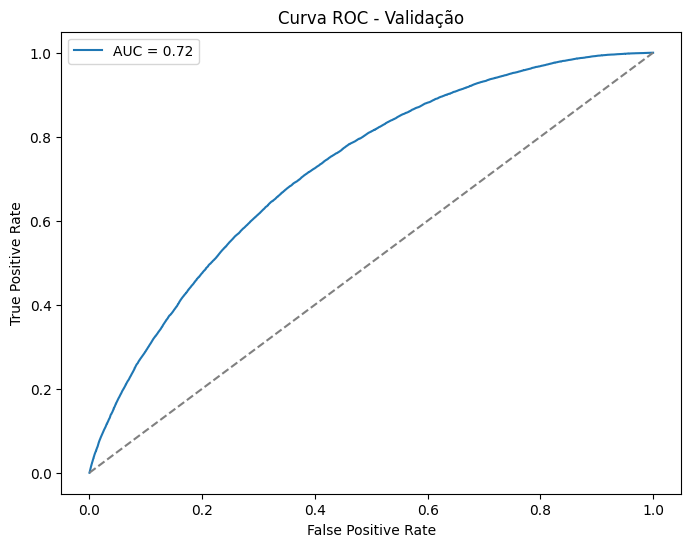

In [ ]:

# Definir função para adicionar colunas agrupadas
def add_grouped_features(df):
    df['educacao_agrupada'] = df['educacao'].replace({
        'Analfabeto': 'Baixo',
        'Fundamental': 'Baixo',
        'Médio': 'Médio',
        'Superior incompleto': 'Alto',
        'Superior completo': 'Alto',
        'Pós-graduação': 'Alto'
    })

    df['estado_civil_agrupado'] = df['estado_civil'].replace({
        'Solteiro': 'Solteiro',
        'Casado': 'Casado',
        'Divorciado': 'Outros',
        'Viúvo': 'Outros',
        'Separado': 'Outros'
    })

    df['tipo_renda_agrupado'] = df['tipo_renda'].replace({
        'Empresário': 'Trabalhador',
        'Assalariado': 'Trabalhador',
        'Servidor público': 'Trabalhador',
        'Pensionista': 'Não Trabalhador',
        'Estudante': 'Não Trabalhador'
    })
    return df

# Adicionar colunas agrupadas aos DataFrames
df_train = add_grouped_features(df_train)
df_val = add_grouped_features(df_val)


# Recriar o conjunto de features
features_agrupadas = [
    'sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos', 
    'educacao_agrupada', 'estado_civil_agrupado', 'tipo_renda_agrupado', 
    'tipo_residencia', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda'
]

# Tratar valores missing nas colunas numéricas
numerical_features = ['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda']
df_2[numerical_features] = df_2[numerical_features].fillna(df_2[numerical_features].median())

# Criar dummies para variáveis categóricas e garantir que as colunas são as mesmas em treino e validação
X_train = pd.get_dummies(df_train[features_agrupadas], drop_first=True)
X_val = pd.get_dummies(df_val[features_agrupadas], drop_first=True)

# Garantir que ambas as bases tenham as mesmas colunas
X_train, X_val = X_train.align(X_val, join='left', axis=1, fill_value=0)

# Substituir NaNs por 0 se necessário
X_train.fillna(0, inplace=True)
X_val.fillna(0, inplace=True)

# Adicionar constante para o modelo
X_train = sm.add_constant(X_train)
X_val = sm.add_constant(X_val)

# Garantir que todos os dados são do tipo float
X_train = X_train.astype(float)
X_val = X_val.astype(float)

# Normalizar os dados numéricos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Ajustar o modelo de regressão logística com regularização
logit_model = LogisticRegression(max_iter=1000, penalty='l2', solver='liblinear')
logit_model.fit(X_train_scaled, df_train['mau'].astype(int))

# Realizar as predições no conjunto de treinamento
y_train_pred_proba = logit_model.predict_proba(X_train_scaled)[:, 1]
y_train_pred = (y_train_pred_proba >= 0.5).astype(int)

# Realizar as predições no conjunto de validação
y_val_pred_proba = logit_model.predict_proba(X_val_scaled)[:, 1]
y_val_pred = (y_val_pred_proba >= 0.5).astype(int)

# Avaliação do modelo no conjunto de validação
accuracy = accuracy_score(df_val['mau'].astype(int), y_val_pred)
auc = roc_auc_score(df_val['mau'].astype(int), y_val_pred_proba)
fpr, tpr, _ = roc_curve(df_val['mau'].astype(int), y_val_pred_proba)

print(f"Acurácia no conjunto de validação: {accuracy}")
print(f"AUC no conjunto de validação: {auc}")

# Plotar curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Validação')
plt.legend()
plt.show()


# a - Criar um pipeline utilizando o sklearn pipeline para o preprocessamento 

## Pré processamento

### Substituição de nulos (nans)

Existe nulos na base? é dado numérico ou categórico? qual o valor de substituição? média? valor mais frequente? etc

In [ ]:
df_2.isna().sum()

data_ref                 0
index                    0
sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
qt_pessoas_residencia    0
renda                    0
mau                      0
qtd_filhos_zero          0
educacao_agrupada        0
estado_civil_agrupado    0
tipo_renda_agrupado      0
dtype: int64

### Remoção de outliers

Como identificar outlier? Substituir o outlier por algum valor? Remover a linha?

In [21]:
# Outliers
def treat_outliers(df_2, numerical_features):
    for col in numerical_features:
        q1 = df_2[col].quantile(0.25)
        q3 = df_2[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df_2[col] = np.clip(df_2[col], lower_bound, upper_bound)
    return df_2

df_2 = treat_outliers(df_2, numerical_features)

### Seleção de variáveis

Qual tipo de técnica? Boruta? Feature importance? 

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

X = pd.get_dummies(df_2[features_agrupadas], drop_first=True)
y = df['mau']

# Ajustar o modelo de árvore de decisão
model = RandomForestClassifier()
model.fit(X, y)

# Selecionar features importantes
selector = SelectFromModel(model, threshold="mean", prefit=True)
X_selected = selector.transform(X)
selected_features = X.columns[selector.get_support()]

print("Features selecionadas:", selected_features)


c:\Users\marce\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Features selecionadas: Index(['idade', 'tempo_emprego', 'renda'], dtype='object')


### Redução de dimensionalidade (PCA)

Aplicar PCA para reduzir a dimensionalidade para 5

In [23]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Verificar o número de características após a normalização
num_features = X_scaled.shape[1]
print(f"Número de características após a normalização: {num_features}")

# Definir o número de componentes para o PCA
n_components = min(num_features, 5)  # Ajustar n_components com base no número de características

# Aplicar PCA
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Número de componentes selecionados:", n_components)


Número de características após a normalização: 3
Explained variance ratio: [0.55748834 0.30743162 0.13508004]
Número de componentes selecionados: 3


### Criação de dummies

Aplicar o get_dummies() ou onehotencoder() para transformar colunas catégoricas do dataframe em colunas de 0 e 1. 
- sexo
- posse_de_veiculo
- posse_de_imovel
- tipo_renda
- educacao
- estado_civil
- tipo_residencia

In [24]:
def create_dummies(df_2, columns):
    return pd.get_dummies(df_2[columns], drop_first=True)

categorical_columns = ['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia']
df_dummies = create_dummies(df_2, categorical_columns)


### Pipeline 

Crie um pipeline contendo essas funções.

preprocessamento()
- substituicao de nulos
- remoção outliers
- PCA
- Criação de dummy de pelo menos 1 variável (posse_de_veiculo)

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


In [33]:
# Ajusta os nomes das colunas conforme o DataFrame
df_2 = df_2.rename(columns={
    'educacao': 'educacao_agrupada',
    'estado_civil': 'estado_civil_agrupado',
    'tipo_renda': 'tipo_renda_agrupado'
})

# Atualiza a lista de features de acordo com os nomes corretos
categorical_features = ['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda_agrupado', 'educacao_agrupada', 'estado_civil_agrupado', 'tipo_residencia']
numeric_features = ['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda']


In [34]:
print("Colunas disponíveis no DataFrame:", df_2.columns.tolist())

Colunas disponíveis no DataFrame: ['data_ref', 'index', 'sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos', 'tipo_renda_agrupado', 'educacao_agrupada', 'estado_civil_agrupado', 'tipo_residencia', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda', 'mau', 'qtd_filhos_zero', 'educacao_agrupada', 'estado_civil_agrupado', 'tipo_renda_agrupado']


In [36]:
# Verificar se há colunas duplicadas
duplicates = X_train.columns[X_train.columns.duplicated()].tolist()
print("Colunas duplicadas em X_train:", duplicates)

Colunas duplicadas em X_train: ['educacao_agrupada', 'estado_civil_agrupado', 'tipo_renda_agrupado']


In [37]:
# Remover colunas duplicadas, mantendo apenas a primeira ocorrência
X_train = X_train.loc[:, ~X_train.columns.duplicated()]

Colunas duplicadas em df_2:
Index([], dtype='object')
Colunas categóricas ausentes em X_train: []
Colunas numéricas ausentes em X_train: []
Shape após pré-processamento: (525000, 25)
Número de características após pré-processamento: 25
Acurácia: 0.9993688888888889
AUC: 1.0


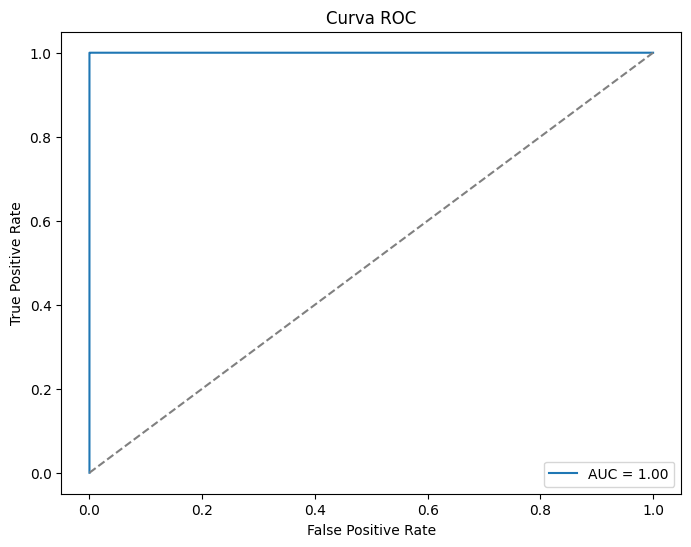

In [46]:
# Dividir dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(df_2[features_agrupadas], df_2['mau'], test_size=0.3, random_state=42)

# Verificar colunas duplicadas
print("Colunas duplicadas em df_2:")
print(df_2.columns[df_2.columns.duplicated()])

# Remover colunas duplicadas, se houver
df_2 = df_2.loc[:, ~df_2.columns.duplicated()]

# Verificar se as colunas categóricas e numéricas estão presentes em X_train
missing_categorical = [col for col in categorical_features if col not in X_train.columns]
missing_numerical = [col for col in numeric_features if col not in X_train.columns]

print("Colunas categóricas ausentes em X_train:", missing_categorical)
print("Colunas numéricas ausentes em X_train:", missing_numerical)

# Definir o pré-processamento
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numeric_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(drop='first'))  # Adicionando sparse=False para obter um DataFrame
        ]), categorical_features)
    ]
)

# Verifique o DataFrame após o pré-processamento
X_transformed = preprocessor.fit_transform(X_train)
print("Shape após pré-processamento:", X_transformed.shape)

# Ajustar o número de componentes do PCA para não exceder o número de características
n_features_after_preprocessing = X_transformed.shape[1]
print("Número de características após pré-processamento:", n_features_after_preprocessing)

pca_n_components = min(1, n_features_after_preprocessing)  # Ajuste o número de componentes conforme necessário

# Definir o pipeline completo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selector', SelectFromModel(RandomForestClassifier(n_estimators=100))),
    ('pca', PCA(n_components=pca_n_components)),
    ('classifier', LogisticRegression(max_iter=1000, penalty='l2', solver='liblinear'))
])

# Ajustar o pipeline
pipeline.fit(X_train, y_train)

# Realizar previsões e avaliação
y_pred = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

print(f"Acurácia: {accuracy}")
print(f"AUC: {auc}")

# Plotar curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend()
plt.show()

# b - Pycaret na base de dados 

Utilize o pycaret para pre processar os dados e rodar o modelo **lightgbm**. Faça todos os passos a passos da aula e gere os gráficos finais. E o pipeline de toda a transformação.



In [4]:
import pandas as pd

df = pd.read_feather('credit_scoring.ftr')
df.head()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,mau
0,2015-01-01,5733,F,N,N,0,Empresário,Médio,Solteiro,Casa,43,6.873973,1.0,2515.39,False
1,2015-01-01,727,F,S,S,0,Assalariado,Médio,Casado,Casa,35,4.526027,2.0,3180.19,False
2,2015-01-01,6374,F,N,N,2,Assalariado,Médio,Casado,Casa,31,0.243836,4.0,1582.29,False
3,2015-01-01,9566,F,N,N,0,Assalariado,Médio,Casado,Casa,54,12.772603,2.0,13721.17,False
4,2015-01-01,9502,F,S,N,0,Assalariado,Superior incompleto,Solteiro,Casa,31,8.432877,1.0,2891.08,False


In [ ]:
from pycaret.classification import *
models()

In [ ]:
xxx = create_model('xxx')